In [ ]:
import re
import os
import json
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from pathlib import Path

In [ ]:
# Define Paths
PROJECT_DIR_PATH = Path.cwd()
DATA_DIR_PATH = PROJECT_DIR_PATH / "data"

In [ ]:
# Set Korean font for Windows
plt.rcParams['font.family'] = 'Malgun Gothic'  # or 'NanumGothic' if installed
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
df = pd.read_csv(DATA_DIR_PATH / "2023_survery.csv")
df.head()

,PID,totgagu1s,birth1,birth2,birth3,birth4,birth5,birth6,choice1,choice2,...,DM8,DM9,DM10,DM101,DM11,DM12,DM13,ADD1,ADD2,ADD3
0,Unnamed: 0,총 가구원 수,출생년도1,출생년도2,출생년도3,출생년도4,출생년도5,출생년도6,코드1,코드2,...,현재 집 거주 기간,주택 유형,주택 점유 형태,직업,월평균 가구소득,경제사회적 위치,정치성향,정책 관심도,시민의견 수렴 정도,수원시정 만족도
1,50,3,1966,1968,1995,NaN,NaN,NaN,1,NaN,...,5년 미만,단독주택,자가,화이트칼라,700만원 이상,중간,중도,보통,미반영,만족
2,51,2,1958,1963,NaN,NaN,NaN,NaN,1,NaN,...,5년 미만,단독주택,자가,블루칼라,700만원 이상,상위,보수,보통,보통,만족
3,52,2,1996,1996,NaN,NaN,NaN,NaN,1,NaN,...,5년 미만,단독주택,자가,화이트칼라,600~700만원 미만,상위,중도,보통,보통,만족
4,53,3,1989,1986,2020,NaN,NaN,NaN,1,NaN,...,5년 미만,단독주택,자가,기타,500~600만원 미만,상위,중도,보통,보통,만족


In [ ]:
pattern = r"[①②③④⑤⑥⑦]"

non_likert_columns = []

for col in df.columns:
    unique_vals = df[col].dropna().astype(str).unique()
    if not any(re.search(pattern, val) for val in unique_vals):
        non_likert_columns.append(col)


In [ ]:
likert_columns = df.columns[~df.columns.isin(non_likert_columns)].tolist()
df_likert = df[likert_columns]
df_non_likert = df[non_likert_columns]

In [ ]:
df_likert.shape, df_non_likert.shape, df.shape

((2042, 140), (2042, 266), (2042, 406))

----

## Likert Col selection
Selecting cols with largely negative sentiment



📊 Column: Q1a5
설문: 문1. 한 주 간 삶의 질 - 5. 외로웠다
비율: 0.4061734443900049
⚠️ Mostly low Likert responses (①–③)


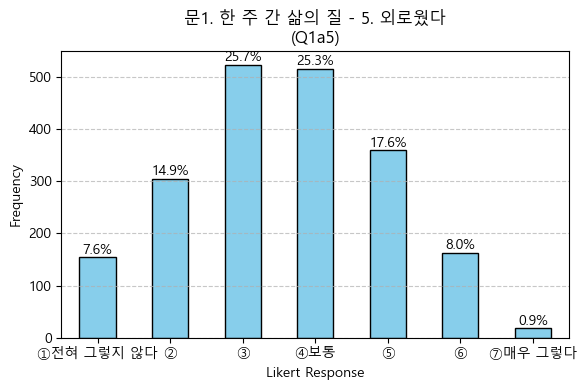


📊 Column: Q1a6
설문: 문1. 한 주 간 삶의 질 - 6. 걱정을 많이 했다
비율: 0.37481626653601174
⚠️ Mostly low Likert responses (①–③)


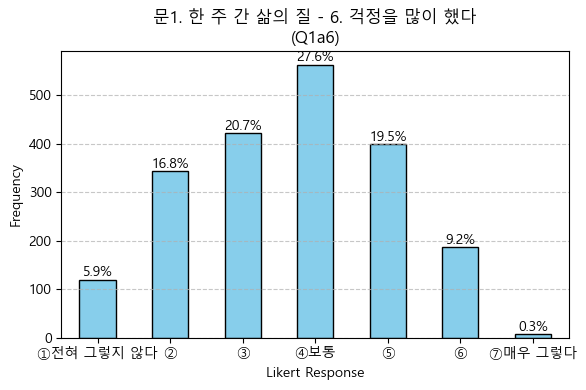


📊 Column: Q1a7
설문: 문1. 한 주 간 삶의 질 - 7. 우울했다
비율: 0.416952474277315
⚠️ Mostly low Likert responses (①–③)


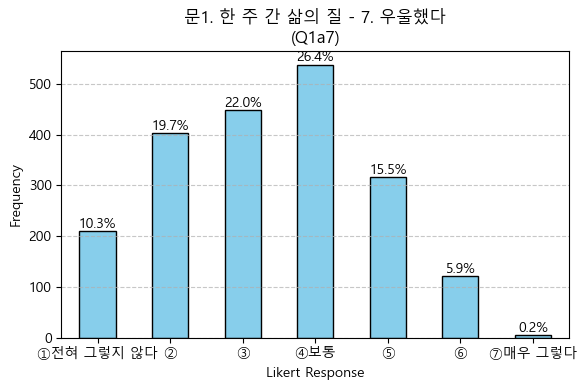


📊 Column: Q22a3
설문: 문22. 수원시 환경문제 수준 - 3. 대기오염/미세먼지
비율: 0.22684958353748164
⚠️ Mostly low Likert responses (①–③)


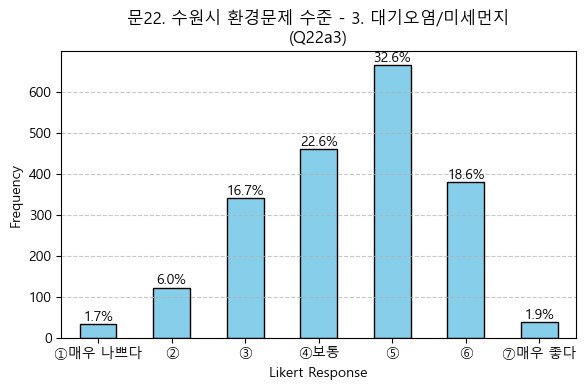

In [ ]:
for col in df_likert.columns:
    question = df_likert[col].iloc[0]  # First row is the question
    responses = df_likert[col].iloc[1:]  # Actual responses

    # Count low-scale responses
    low_scale = ['①', '②', '③']
    total = responses.count()
    low_count = responses.isin(low_scale).sum()
    low_ratio = low_count / total

    if low_ratio > 0.2:
        print(f"\n📊 Column: {col}")
        print(f"설문: {question}")
        print(f"비율: {low_ratio}")
        print("⚠️ Mostly low Likert responses (①–③)")

        # Get frequency and percentage
        counts = responses.value_counts().sort_index()
        percentages = (counts / total * 100).round(1)

        # Plot histogram
        plt.figure(figsize=(6, 4))
        ax = counts.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f"{question}\n({col})")
        plt.xlabel("Likert Response")
        plt.ylabel("Frequency")
        plt.xticks(rotation=0)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Add percentage labels on top of bars
        for i, (count, pct) in enumerate(zip(counts, percentages)):
            ax.text(i, count + 0.5, f"{pct}%", ha='center', va='bottom', fontsize=10)

        plt.tight_layout()
        plt.show()